In [113]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from datasets.nuscenes_dataset import NuScenesDataset
from utils.image_projection import get_data_info, _draw_3dbox
from utils.config import cfg, cfg_from_yaml_file
import torch, torchvision
import open3d as o3d

import os
# import image_projection

In [114]:
def _get_lidar2img_rt(index, camera_id, infos):
    lidar2img_rt = get_data_info(infos[index], camera_id)
    return lidar2img_rt

def _get_image(image_path):
    image = cv2.imread(image_path)
    return image

In [115]:
cfg_dataset = 'configs/nuscenes_dataset.yaml'
dataset_cfg = cfg_from_yaml_file(cfg_dataset, cfg)
dataset = NuScenesDataset(dataset_cfg)

In [116]:
cfg_model = 'configs/voxelnext.yaml'
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
model_cfg = cfg_from_yaml_file(cfg_model, cfg)
model = Model(model_cfg, device)

In [124]:
# Note that this is an example using nuScenes dataset
# You can use it with other image, point, and lidar2img_rt
infos = pickle.load(open("nuscenes_camera_infos.pkl", 'rb'))
frame_index = 0
camera_type = 'CAM_BACK'

point_dict = dataset._get_points(frame_index)
lidar_path = os.path.join(dataset.root_path, dataset.infos[frame_index]["lidar_path"])
print(lidar_path)

for i in range(len(infos)):
    if infos[i]['LIDAR_TOP']['data_path'] == lidar_path:
        print('Found matching lidar path')
        break
print(infos[i]['LIDAR_TOP']['data_path'])

lidar2img_rt = _get_lidar2img_rt(i, camera_type, infos)
image_path = infos[i][camera_type]['data_path']
image_id = image_path.split('/')[-1].rstrip('jpg')
image = _get_image(image_path)

o3d_pcd = o3d.geometry.PointCloud()
o3d_pcd.points = o3d.utility.Vector3dVector(point_dict['points'][:, :3])
o3d.visualization.draw_geometries([o3d_pcd])

data/nuscenes/samples/LIDAR_TOP/n008-2018-08-01-15-16-36-0400__LIDAR_TOP__1533151603547590.pcd.bin
Found matching lidar path
data/nuscenes/samples/LIDAR_TOP/n008-2018-08-01-15-16-36-0400__LIDAR_TOP__1533151603547590.pcd.bin


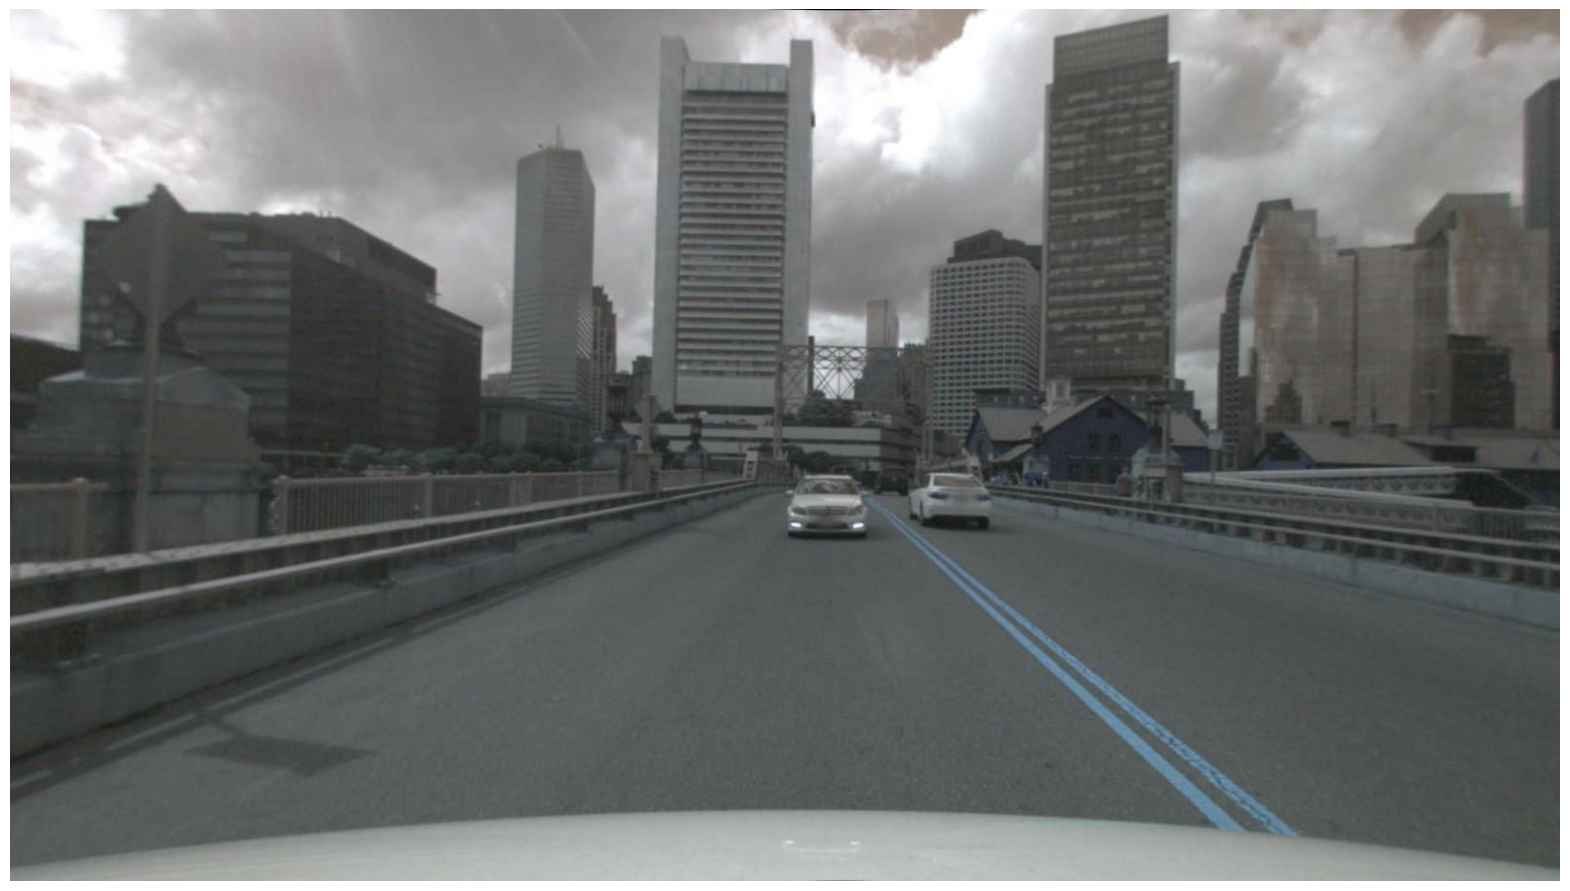

In [123]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [134]:
prompt_point = np.array([[955, 506]])
mask, box3d, pred_dicts = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score=0.5)

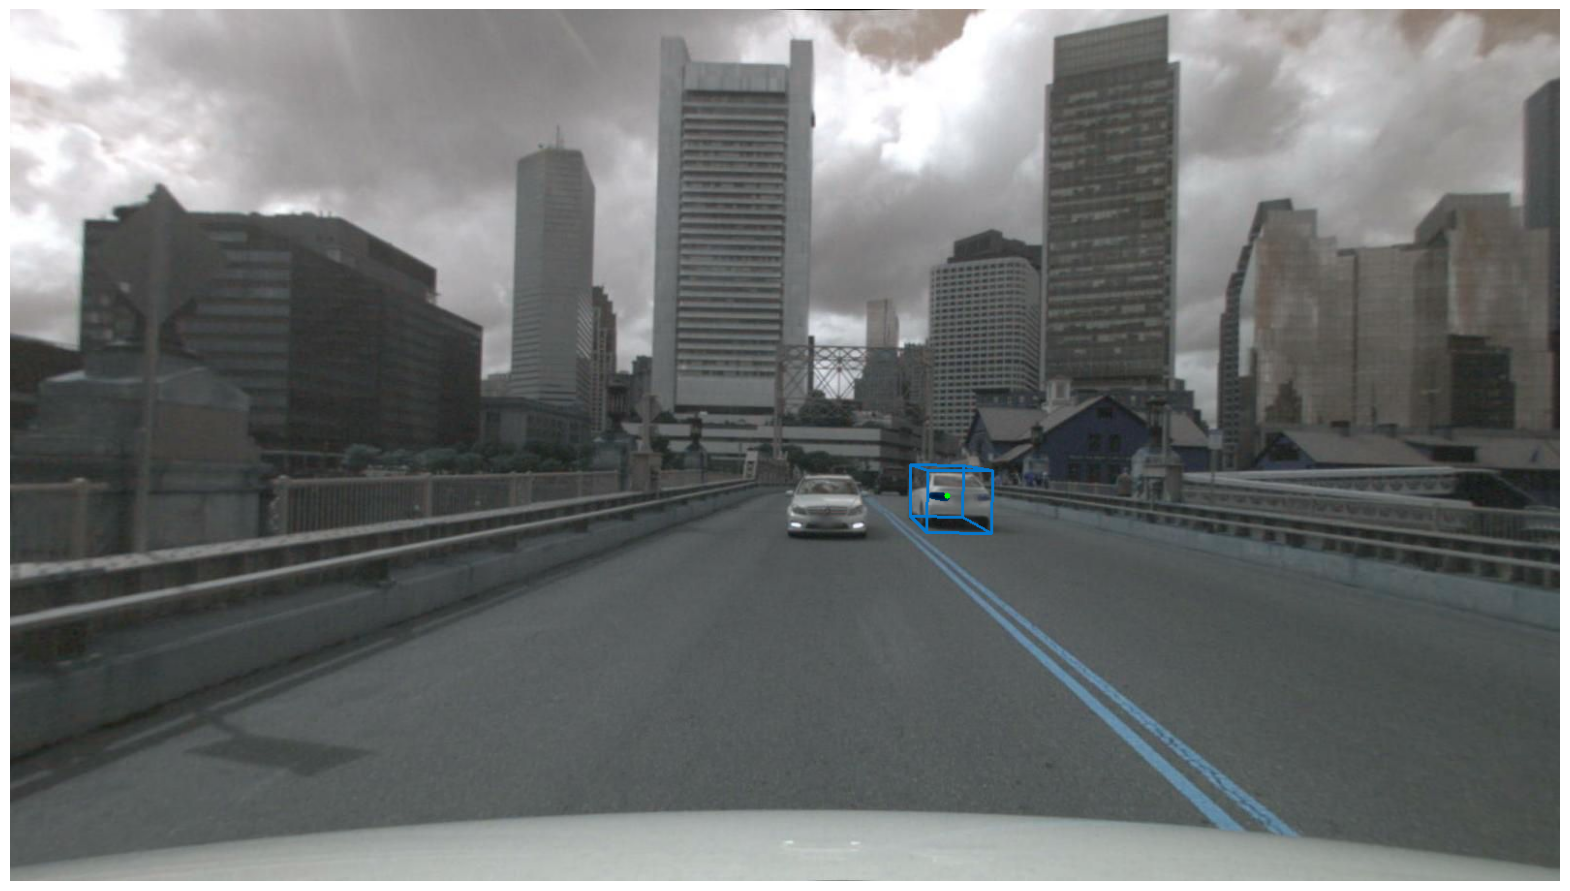

In [135]:
image = _get_image(image_path)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)

# for i in range(len(pred_dicts[0]['pred_boxes'])):
#     if pred_dicts[0]['pred_scores'][i] < 0.5:
#         continue
#     box = pred_dicts[0]['pred_boxes'][i]
#     image = _draw_3dbox(box, lidar2img_rt, image, mask)
    
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

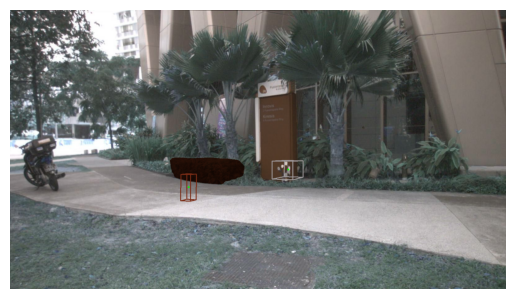

In [25]:
prompt_point = np.array([[820, 480]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

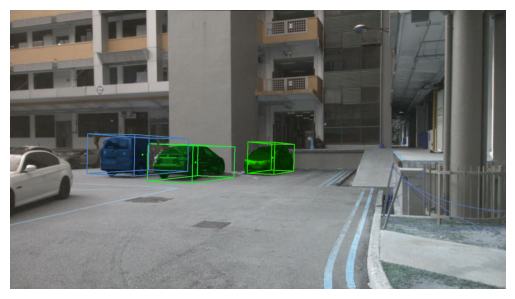

In [9]:
prompt_point = np.array([[350, 470]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

In [20]:
frame_index = 10
camera_type = 'CAM_FRONT_RIGHT'
lidar2img_rt = _get_lidar2img_rt(frame_index, camera_type, infos)
point_dict = dataset._get_points(frame_index)
image_path = infos[frame_index][camera_type]['data_path']
image_id = image_path.split('/')[-1].rstrip('jpg')
image = _get_image(image_path)

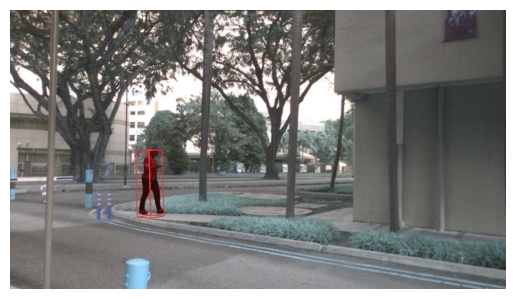

In [21]:
prompt_point = np.array([[452, 530]])
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

In [26]:
frame_index = 10
camera_type = 'CAM_FRONT'
lidar2img_rt = _get_lidar2img_rt(frame_index, camera_type, infos)
point_dict = dataset._get_points(frame_index)
image_path = infos[frame_index][camera_type]['data_path']
image_id = image_path.split('/')[-1].rstrip('jpg')
image = _get_image(image_path)

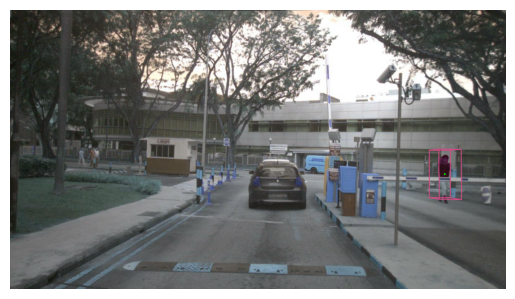

In [27]:
prompt_point = np.array([[1402, 525]])
quality_score = 0.5
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

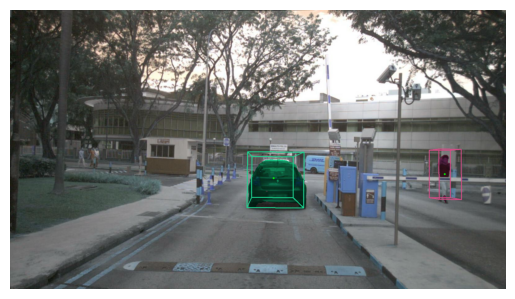

In [ ]:
prompt_point = np.array([[848, 572]])
quality_score = 0.5
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

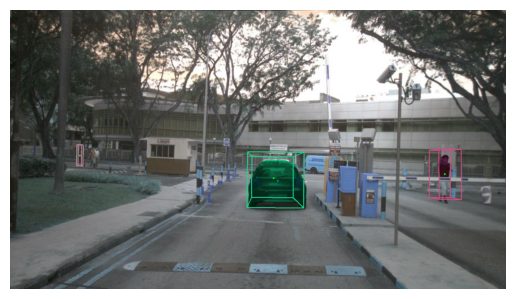

In [29]:
prompt_point = np.array([[230, 470]])
quality_score = 0.5
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

In [31]:
frame_index = 10
camera_type = 'CAM_BACK'
lidar2img_rt = _get_lidar2img_rt(frame_index, camera_type, infos)
point_dict = dataset._get_points(frame_index)
image_path = infos[frame_index][camera_type]['data_path']
image_id = image_path.split('/')[-1].rstrip('jpg')
image = _get_image(image_path)

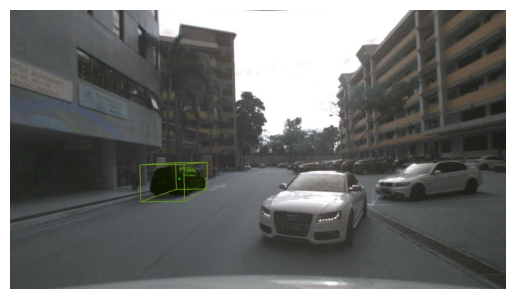

In [32]:
prompt_point = np.array([[530, 560]])
quality_score = 0.5
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

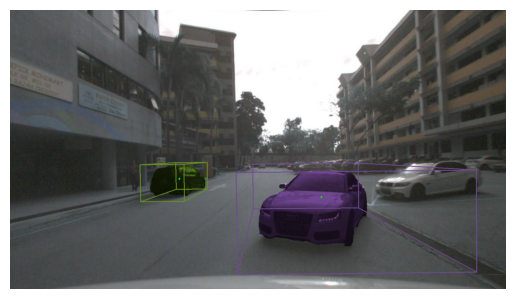

In [33]:
prompt_point = np.array([[960, 630]])
quality_score = 0.5
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()

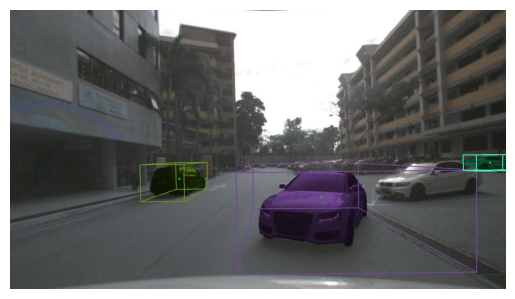

In [34]:
prompt_point = np.array([[1540, 490]])
quality_score = 0.5
mask, box3d = model(image, point_dict, prompt_point, lidar2img_rt, image_id, quality_score)
if not box3d is None:
    image = _draw_3dbox(box3d, lidar2img_rt, image, mask)
plt.imshow(image)
plt.axis('off')
plt.show()